# Exploration of Radar data

In [1]:
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
import pandas as pd

%matplotlib widget

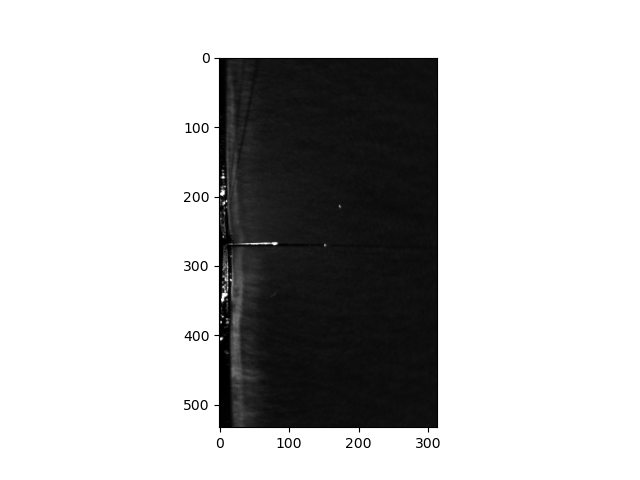

In [2]:
# load .tif that corresponds to Mission 19 - test case
image = plt.imread('../microSWIFT_data/SuFMoS/2x_per_hour/closest_to_mission21.tif')
imgplot = plt.imshow(image, cmap='gray')

In [3]:
# Set up x and y locations to plot the the image with real cooridinates
dx = 7.5 # meters
dy = 7.5 # meters
x_angle_to_north = 71.85 # degrees from north

# Geo referenced coordinates
Latitude = 36.182297190761240
Longitude = -75.751178452330976
xFRF_radar = 34.84
yFRF_radar = 537.37

# Set up vectors with xand y coordinates
xmin = -45
xmax = 2295
xvec = np.arange(xmin, xmax+dx, dx) # np.arange is non inclusive last step so add one dx
xFRF_vec = xvec + xFRF_radar

ymin = -1995
ymax = 1995
yvec = np.arange(ymin, ymax+dy, dy) # np.arange is non inclusive last step so add one dy
yFRF_vec = yvec + yFRF_radar

gridx, gridy = np.meshgrid(xvec,yvec)
gridxFRF, gridyFRF = np.meshgrid(xFRF_vec,yFRF_vec)

# Check all shapes
print(gridxFRF.shape)
print(gridyFRF.shape)
print(image.shape)


(533, 313)
(533, 313)
(533, 313)


(-13.909999999999997, 2333.59, -1461.38, 2536.12)

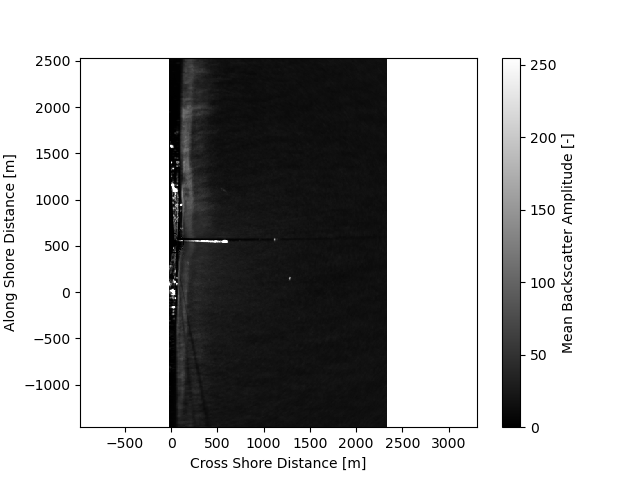

In [4]:
# Plot the image as a pcolor
fig, ax = plt.subplots()
im = ax.pcolor(gridxFRF, gridyFRF, image, cmap='gray')
cbar = fig.colorbar(im)
cbar.set_label('Mean Backscatter Amplitude [-]')
ax.set_xlabel('Cross Shore Distance [m]')
ax.set_ylabel('Along Shore Distance [m]')
ax.axis('equal')

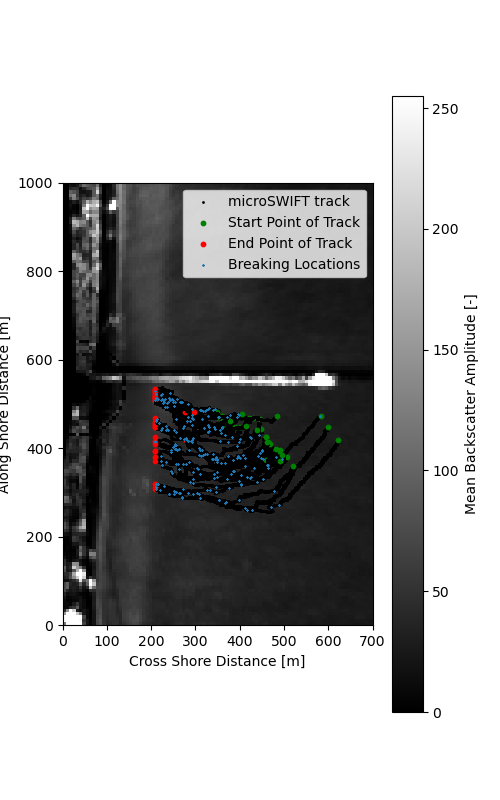

In [10]:
# Load mission 21 data and plot tracks over the radar image
mission_nc_path = '../microSWIFT_data/final_dataset/mission_21.nc'
mission_dataset = nc.Dataset(mission_nc_path, mode='r')

# Load the breaker dataset
breaker_df = pd.read_csv('../microSWIFT_data/breaker_df.csv')
breaker_df_mission19 = breaker_df[breaker_df['mission number'] == 21]

# Plot the microSWIFT tracks over the radar image
x_locations = np.ma.masked_invalid(mission_dataset['xFRF'])
y_locations = np.ma.masked_invalid(mission_dataset['yFRF'])
time_vals = mission_dataset['time'][:]

fig, ax = plt.subplots(figsize=(5,8))
im = ax.pcolor(gridxFRF, gridyFRF, image, cmap='gray')
cbar = fig.colorbar(im)
cbar.set_label('Mean Backscatter Amplitude [-]')

for n in range(mission_dataset['trajectory'].size-1):
    edge_inds_x = np.ma.flatnotmasked_edges(x_locations[n,:])
    edge_inds_y = np.ma.flatnotmasked_edges(y_locations[n,:])
    start_ind = np.max([edge_inds_x[0], edge_inds_y[0]])
    end_ind = np.min([edge_inds_x[1], edge_inds_y[1]])
    map = ax.scatter(x_locations[n,:],
                        y_locations[n,:],
                        c='k', s=1)
    map = ax.scatter(x_locations[n,start_ind],
                     y_locations[n,start_ind],
                     c='g', s=10)
    map = ax.scatter(x_locations[n,end_ind],
                     y_locations[n,end_ind],
                     c='r', s=10)
    
# plot last track and label points for legend
edge_inds_x = np.ma.flatnotmasked_edges(x_locations[-1,:])
edge_inds_y = np.ma.flatnotmasked_edges(y_locations[-1,:])
start_ind = np.max([edge_inds_x[0], edge_inds_y[0]])
end_ind = np.min([edge_inds_x[1], edge_inds_y[1]])
map = ax.scatter(x_locations[-1,:],
                    y_locations[-1,:],
                    c='k', s=1, label='microSWIFT track')
map = ax.scatter(x_locations[-1,start_ind],
                    y_locations[-1,start_ind],
                    c='g', s=10, label='Start Point of Track')
map = ax.scatter(x_locations[-1,end_ind],
                    y_locations[-1,end_ind],
                    c='r', s=10, label='End Point of Track')

# Scatter all Detected Breaking locations from the mission
ax.scatter(breaker_df_mission19['cross shore location [m]'], breaker_df_mission19['along shore location [m]'], 
           marker='x', label='Breaking Locations', s=1)


ax.set_xlim(0, 700)
ax.set_ylim(0, 1000)
ax.set_xlabel('Cross Shore Distance [m]')
ax.set_ylabel('Along Shore Distance [m]')
ax.legend()
ax.set_aspect('equal')